In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

# sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")
# sys.path.append("/Users/alexandrerame/code_repository/notebook/data")

from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (20, 20)
# plot.plt.rcParams['text.usetex'] = True
plot.plt.rcParams['font.family'] = 'serif'
plot.plt.rcParams['font.serif'] = 'Times Roman'
# plot.FORMAT_X=1
# plot.FORMAT_Y=3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# create yellow colormaps
N = 256
yellow = np.ones((N, 4))
yellow[:, 0] = np.linspace(1, 255 / 256, N)  # R = 255
yellow[:, 1] = np.linspace(1, 232 / 256, N)  # G = 232
yellow[:, 2] = np.linspace(1, 11 / 256, N)  # B = 11
yellow_cmp = ListedColormap(yellow)

In [3]:

from corrupt import inf_corrupt_vs_empty_res, inf12_corrupt_vs_empty_res, inf2_corrupt_vs_empty_res
from corrupt.gaussian import inf11_gaussian_vs_empty_res
from corrupt import infhome0_corrupt, infhomecorrupt1_net_weighting, inf_steps_lp


In [4]:
dict_strategy_to_name = {
    "11": "1 Clean + 1 Corrupted",
    "12": "2 Clean + 1 Corrupted",
    "22": "2 Clean + 2 Corrupted",
    "11g": "1 Clean + 1 Gaussian",
}
dict_strategy_to_d = {
    "11": inf_corrupt_vs_empty_res,
    "12": inf12_corrupt_vs_empty_res,
    "22": inf2_corrupt_vs_empty_res,   
    "11g": inf11_gaussian_vs_empty_res
}

In [19]:
plot.dict_key_to_label.update(
    {
        "env_2_in_acc": "WA on train corrupted",
        "env_2_in_acc_ens": "ENS on train corrupted",
        "env_2_in_acc_ensp": "ENS after SOFTMAX on train corrupted",
        "env_1_in_acc": "WA on train clean",
        "env_1_in_acc_ens": "ENS on train clean",
        "env_1_out_acc": "WA on val clean",
        "env_1_out_acc_ens": "ENS on val clean",
        "env_1_out_acc_ensp": "ENS after SOFTMAXon val clean",        
        "trainin_acc": "WA on train",
        "trainin_acc_ens": "ENS on train",
        "trainin_acc_netm": "WA on train",
        "train_acc": "WA on val",
        "train_acc_ens": "ENS on val",
        "train_acc_netm": "WA on val",       
        "acc": "WA on OOD",
        "acc_ens": "ENS on OOD",
        "acc_netm": "WA on OOD"        
    }
)

/private/home/alexandrerame/.conda/envs/pytorch/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


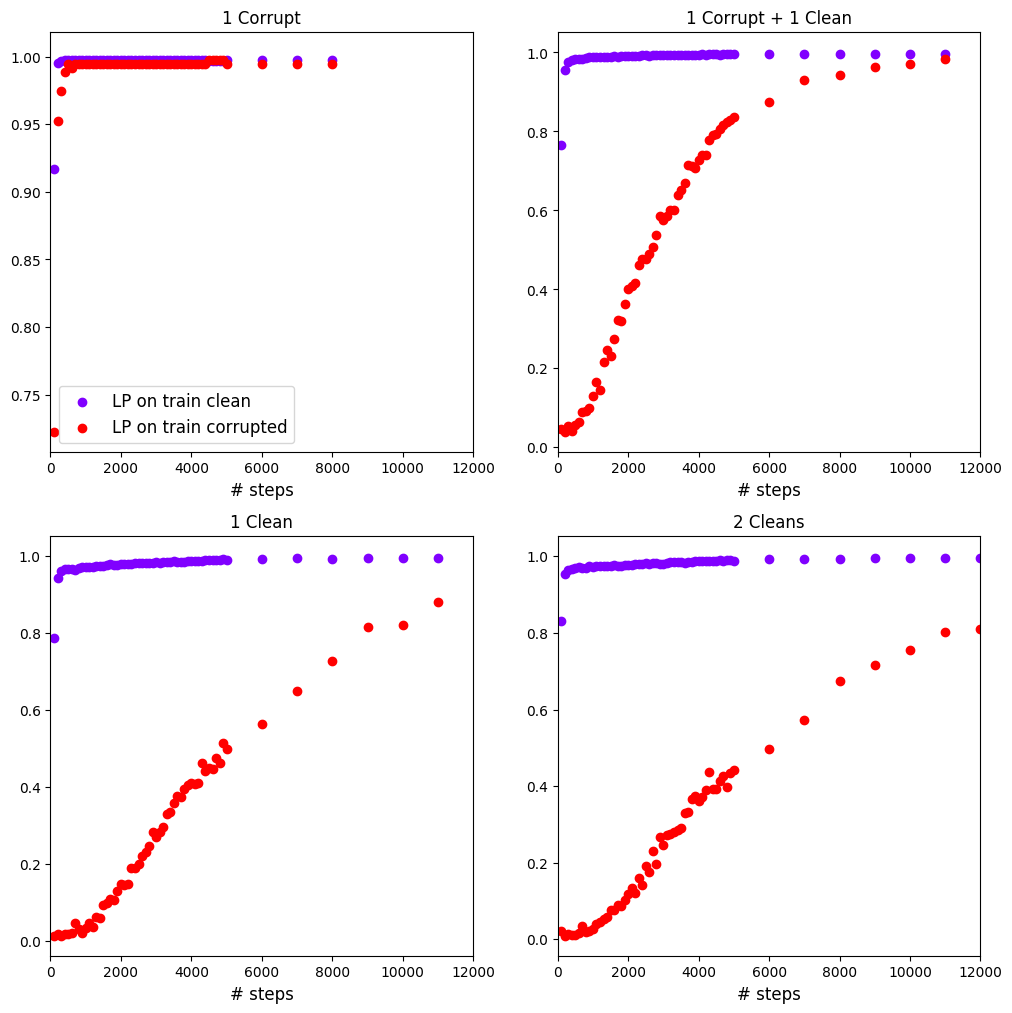

In [8]:
fig, axes = plt.subplots(2, 2)
plot.plt.rcParams["figure.figsize"] = (10, 10)
dict_key_to_title = {
    '10': "1 Corrupt",
    "11": "1 Corrupt + 1 Clean",
    "01": "1 Clean",
    "02": "2 Cleans",
}
for i, key in enumerate(['10', "11", "01", "02"]):
    _ = plot.plot_basic_scatter(
        inf_steps_lp.d[key],
        key_x="step",
        keys_y=["env_1_in_acc", "env_2_in_acc"],
        loc="best" if i == 0 else "no",
        # order=1 if i==0 else 2,
        title=dict_key_to_title[key],
        kwargs={"alpha": 0.2},
        ax1=axes[i // 2][i % 2],
        _dict_key_to_limit={"step": [0, 12000]}
    )
fig.show()


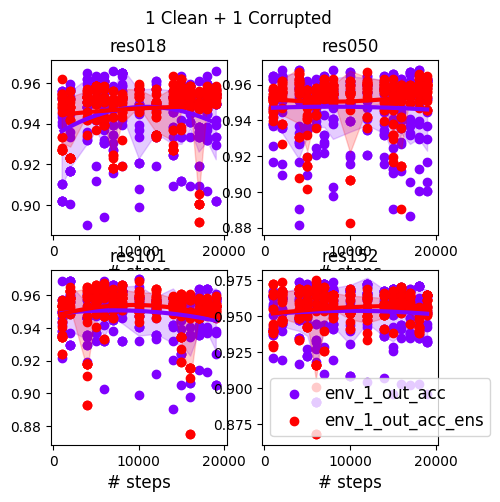

In [10]:
strategy = "11"
fig, axes = plt.subplots(2, 2)
plot.plt.rcParams["figure.figsize"] = (12, 12)
for i, key in enumerate(['res018', 'res050', 'res101', 'res152']):
    _ = plot.plot_basic_scatter(
        dict_strategy_to_d[strategy].d[key],
        key_x="step",
        # keys_y=["acc", "acc_ens"],
        # keys_error=["acc_std", "acc_ens_std"],        
        keys_y=["env_1_out_acc", "env_1_out_acc_ens"],
        keys_error=["env_1_out_acc_std", "env_1_out_acc_ens_std"],
        loc="best" if i==3 else "no",
        keyclustering="step",
        order=2,
        title=key,
        kwargs={"alpha": 0.2},
        # _dict_key_to_limit={"env_2_in_acc": [-0.05, 0.72]},
        ax1=axes[i // 2][i % 2]
    )
plt.suptitle(dict_strategy_to_name[strategy])
fig.show()


In [11]:
# (pytorch) alexandrerame@devfair0751:~/slurmconfig/home0926/traincorrupted/inf/runs$ cat inf12homecorrupt1-1_net_res152_v2.slurm_2697571.out | grep "&&"
lsoftgauss = []
lsoftgauss.append({"acc": 0.6824474660074166, "acc_ens": 0.6603419859909353, "acc_ensp": 0.6563246806757315, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9918184723553853, "env_1_in_acc_ens": 0.9922179610099076, "env_1_in_acc_ensp": 0.9933205496963886, "env_1_out_acc": 0.9517023959646913, "env_1_out_acc_ens": 0.9484867591424967, "env_1_out_acc_ensp": 0.9488020176544769, "env_2_in_acc": 0.09523809523809525, "env_2_in_acc_ens": 0.08949579831932773, "env_2_in_acc_ensp": 0.369047619047619, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.0, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 1000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6911825298722702, "acc_ens": 0.6775030902348581, "acc_ensp": 0.6723733003708282, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9909236177692554, "env_1_in_acc_ens": 0.9948545861297541, "env_1_in_acc_ensp": 0.9949344838606585, "env_1_out_acc": 0.9540983606557377, "env_1_out_acc_ens": 0.9578814627994957, "env_1_out_acc_ensp": 0.9574401008827238, "env_2_in_acc": 0.13305322128851543, "env_2_in_acc_ens": 0.13767507002801121, "env_2_in_acc_ensp": 0.4378151260504201, "env_2_out_acc": 0.000641025641025641, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.0, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 2000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6852492789451999, "acc_ens": 0.668912237330037, "acc_ensp": 0.6627935723114956, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9934483860658357, "env_1_in_acc_ens": 0.9955417066155322, "env_1_in_acc_ensp": 0.995126238414829, "env_1_out_acc": 0.9545397225725093, "env_1_out_acc_ens": 0.9559268600252204, "env_1_out_acc_ensp": 0.9530895334174023, "env_2_in_acc": 0.1738095238095238, "env_2_in_acc_ens": 0.17829131652661062, "env_2_in_acc_ensp": 0.511064425770308, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.0019230769230769232, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 4000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.684301606922126, "acc_ens": 0.6679027606098062, "acc_ensp": 0.661145447053976, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9925215723873444, "env_1_in_acc_ens": 0.9953819111537234, "env_1_in_acc_ensp": 0.995397890699904, "env_1_out_acc": 0.953026481715006, "env_1_out_acc_ens": 0.9557377049180327, "env_1_out_acc_ensp": 0.9555485498108449, "env_2_in_acc": 0.18179271708683478, "env_2_in_acc_ens": 0.17268907563025213, "env_2_in_acc_ensp": 0.49901960784313715, "env_2_out_acc": 0.003205128205128205, "env_2_out_acc_ens": 0.000641025641025641, "env_2_out_acc_ensp": 0.001282051282051282, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 5000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6539142974866091, "acc_ens": 0.6417799752781213, "acc_ensp": 0.6348990523279769, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.986944710770214, "env_1_in_acc_ens": 0.9893576222435282, "env_1_in_acc_ensp": 0.9880313199105146, "env_1_out_acc": 0.9392812105926861, "env_1_out_acc_ens": 0.9404161412358132, "env_1_out_acc_ensp": 0.93203026481715, "env_2_in_acc": 0.19929971988795514, "env_2_in_acc_ens": 0.25840336134453773, "env_2_in_acc_ensp": 0.45448179271708683, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.000641025641025641, "env_2_out_acc_ensp": 0.000641025641025641, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 6000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6778739184177996, "acc_ens": 0.6541615162752368, "acc_ensp": 0.6477956324680676, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9917066155321189, "env_1_in_acc_ens": 0.9954618088846277, "env_1_in_acc_ensp": 0.995557686161713, "env_1_out_acc": 0.9575662042875157, "env_1_out_acc_ens": 0.9571248423707439, "env_1_out_acc_ensp": 0.9580075662042873, "env_2_in_acc": 0.1495798319327731, "env_2_in_acc_ens": 0.24467787114845932, "env_2_in_acc_ensp": 0.5722689075630252, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.000641025641025641, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 7000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6854758961681088, "acc_ens": 0.661330861145447, "acc_ensp": 0.6560568603213845, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9942473633748803, "env_1_in_acc_ens": 0.9961649089165869, "env_1_in_acc_ensp": 0.9962288271013104, "env_1_out_acc": 0.9560529634300126, "env_1_out_acc_ens": 0.9602774274905421, "env_1_out_acc_ensp": 0.96046658259773, "env_2_in_acc": 0.1829131652661064, "env_2_in_acc_ens": 0.2203081232492997, "env_2_in_acc_ensp": 0.5868347338935573, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.0, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 8000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoftgauss.append({"acc": 0.6610424392253812, "acc_ens": 0.6444375772558715, "acc_ensp": 0.6372270292542234, "dirs": "homecorrupt1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9925215723873441, "env_1_in_acc_ens": 0.9947906679450306, "env_1_in_acc_ensp": 0.9949664429530204, "env_1_out_acc": 0.9507566204287515, "env_1_out_acc_ens": 0.9557377049180328, "env_1_out_acc_ensp": 0.957250945775536, "env_2_in_acc": 0.20364145658263305, "env_2_in_acc_ens": 0.23403361344537815, "env_2_in_acc_ensp": 0.5392156862745099, "env_2_out_acc": 0.0, "env_2_out_acc_ens": 0.0, "env_2_out_acc_ensp": 0.001282051282051282, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 10000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
# (pytorch) alexandrerame@devfair0751:~/slurmconfig/home0926/traincorrupted/inf/runs$ cat inf12homecorrupt1-1_net_res152.slurm_2697566.out | grep "&&"
lsoft = []
lsoft.append({"acc": 0.6919035846724352, "acc_ens": 0.6748660898228265, "acc_ensp": 0.6754017305315204, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9921860019175457, "env_1_in_acc_ens": 0.9923298178331736, "env_1_in_acc_ensp": 0.9930648769574943, "env_1_out_acc": 0.9513871374527115, "env_1_out_acc_ens": 0.9493694829760406, "env_1_out_acc_ensp": 0.9522068095838586, "env_2_in_acc": 0.017787114845938378, "env_2_in_acc_ens": 0.013585434173669466, "env_2_in_acc_ensp": 0.013585434173669466, "env_2_out_acc": 0.020512820512820513, "env_2_out_acc_ens": 0.000641025641025641, "env_2_out_acc_ensp": 0.0, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 1000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6850432632880099, "acc_ens": 0.6723114956736712, "acc_ensp": 0.6743716522455708, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9917225950782997, "env_1_in_acc_ens": 0.9940875679130713, "env_1_in_acc_ensp": 0.9946468520294023, "env_1_out_acc": 0.9498738965952083, "env_1_out_acc_ens": 0.9552963430012609, "env_1_out_acc_ensp": 0.9578184110970996, "env_2_in_acc": 0.022268907563025214, "env_2_in_acc_ens": 0.10952380952380951, "env_2_in_acc_ensp": 0.14313725490196078, "env_2_out_acc": 0.007692307692307693, "env_2_out_acc_ens": 0.003205128205128205, "env_2_out_acc_ensp": 0.0, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 2000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6857025133910176, "acc_ens": 0.6702307375360527, "acc_ensp": 0.6703131437989287, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9943911792905082, "env_1_in_acc_ens": 0.9950623202301054, "env_1_in_acc_ensp": 0.9950623202301054, "env_1_out_acc": 0.9530895334174023, "env_1_out_acc_ens": 0.9574401008827238, "env_1_out_acc_ensp": 0.9554854981084487, "env_2_in_acc": 0.03865546218487395, "env_2_in_acc_ens": 0.3620448179271709, "env_2_in_acc_ensp": 0.3705882352941176, "env_2_out_acc": 0.015384615384615385, "env_2_out_acc_ens": 0.01346153846153846, "env_2_out_acc_ensp": 0.01153846153846154, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 4000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6811701689328389, "acc_ens": 0.6678615574783683, "acc_ensp": 0.6678821590440872, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9935602428891022, "env_1_in_acc_ens": 0.9955417066155322, "env_1_in_acc_ensp": 0.9954298497922659, "env_1_out_acc": 0.950189155107188, "env_1_out_acc_ens": 0.9560529634300126, "env_1_out_acc_ensp": 0.9590163934426228, "env_2_in_acc": 0.050980392156862744, "env_2_in_acc_ens": 0.44635854341736697, "env_2_in_acc_ensp": 0.4763305322128851, "env_2_out_acc": 0.023717948717948724, "env_2_out_acc_ens": 0.010256410256410258, "env_2_out_acc_ensp": 0.005769230769230768, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 5000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6704573547589617, "acc_ens": 0.6612690564482901, "acc_ensp": 0.6624021425628348, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9868168744007673, "env_1_in_acc_ens": 0.9944870565675934, "env_1_in_acc_ensp": 0.9941195270054329, "env_1_out_acc": 0.9490542244640604, "env_1_out_acc_ens": 0.9390290037831022, "env_1_out_acc_ensp": 0.9366330390920554, "env_2_in_acc": 0.06554621848739496, "env_2_in_acc_ens": 0.5330532212885155, "env_2_in_acc_ensp": 0.6277310924369749, "env_2_out_acc": 0.00641025641025641, "env_2_out_acc_ens": 0.008333333333333333, "env_2_out_acc_ensp": 0.010897435897435897, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 6000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6761227853316852, "acc_ens": 0.6517923362175526, "acc_ensp": 0.6495261639884632, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9927293064876958, "env_1_in_acc_ens": 0.9952380952380955, "env_1_in_acc_ensp": 0.9956695429849793, "env_1_out_acc": 0.9571248423707441, "env_1_out_acc_ens": 0.9563051702395964, "env_1_out_acc_ensp": 0.9575662042875157, "env_2_in_acc": 0.05952380952380952, "env_2_in_acc_ens": 0.6266106442577032, "env_2_in_acc_ensp": 0.7225490196078431, "env_2_out_acc": 0.008974358974358974, "env_2_out_acc_ens": 0.02435897435897436, "env_2_out_acc_ensp": 0.007051282051282051, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 7000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6759579728059333, "acc_ens": 0.6521837659662133, "acc_ensp": 0.6528430160692215, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9945349952061362, "env_1_in_acc_ens": 0.9955896452540747, "env_1_in_acc_ensp": 0.9959891339085971, "env_1_out_acc": 0.9481084489281211, "env_1_out_acc_ens": 0.9554854981084491, "env_1_out_acc_ensp": 0.9586380832282473, "env_2_in_acc": 0.08445378151260505, "env_2_in_acc_ens": 0.742296918767507, "env_2_in_acc_ensp": 0.7663865546218487, "env_2_out_acc": 0.01217948717948718, "env_2_out_acc_ens": 0.01858974358974359, "env_2_out_acc_ensp": 0.008333333333333335, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 8000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6668520807581377, "acc_ens": 0.6492995467655541, "acc_ensp": 0.6478368355995056, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9938478747203581, "env_1_in_acc_ens": 0.9968680089485458, "env_1_in_acc_ensp": 0.9968360498561843, "env_1_out_acc": 0.9525220680958386, "env_1_out_acc_ens": 0.9544136191677174, "env_1_out_acc_ensp": 0.9567465321563683, "env_2_in_acc": 0.10546218487394958, "env_2_in_acc_ens": 0.8834733893557422, "env_2_in_acc_ensp": 0.9294117647058824, "env_2_out_acc": 0.009615384615384614, "env_2_out_acc_ens": 0.01794871794871795, "env_2_out_acc_ensp": 0.014102564102564105, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 10000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})
lsoft.append({"acc": 0.6475896168108777, "acc_ens": 0.6310671611042439, "acc_ensp": 0.6300988875154513, "dirs": "homecorruptgaussian1_erm2_lp_0120_res152,homecorrupt-1_erm2_lp_0120_res152", "dirslen": 2.0, "env_1_in_acc": 0.9908277404921702, "env_1_in_acc_ens": 0.9958453179929689, "env_1_in_acc_ensp": 0.9962607861936721, "env_1_out_acc": 0.9575662042875157, "env_1_out_acc_ens": 0.9567465321563681, "env_1_out_acc_ensp": 0.9599621689785623, "env_2_in_acc": 0.06008403361344537, "env_2_in_acc_ens": 0.9053221288515406, "env_2_in_acc_ensp": 0.9397759103641457, "env_2_out_acc": 0.008333333333333333, "env_2_out_acc_ens": 0.008333333333333335, "env_2_out_acc_ensp": 0.01666666666666667, "length": 2.0, "lengthf": 2.0, "maxm": 0.0, "numsamples": 20, "step": 12000, "testenv": 0, "topk": "1-_-1", "trialseed": 0.0, "printres": "&&"})

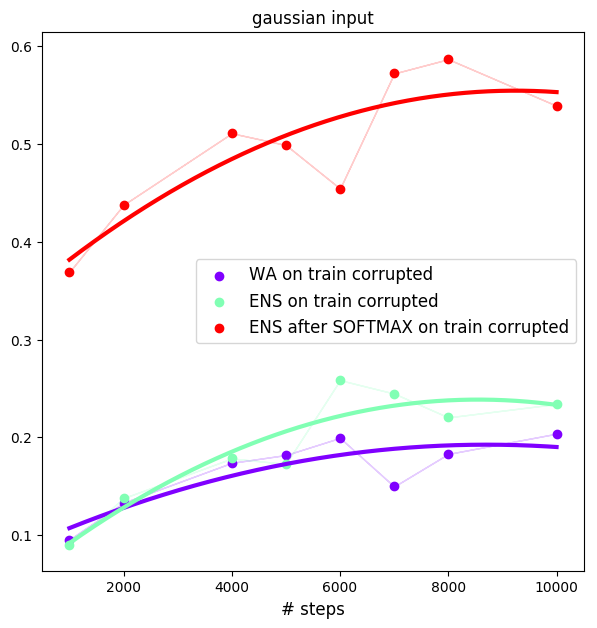

In [22]:

plot.plt.rcParams["figure.figsize"] = (7, 7)
fig = plot.plot_basic_scatter(
        lsoftgauss,
        key_x="step",       
        keys_y=["env_2_in_acc", "env_2_in_acc_ens", "env_2_in_acc_ensp"],
        keys_error=["env_2_in_acc_std", "env_2_in_acc_ens_std", "env_2_in_acc_ensp_std"],
        loc="best",
        keyclustering="step",
        order=2,
        title="gaussian input",
        kwargs={"alpha": 0.2},
        # _dict_key_to_limit={"env_2_in_acc": [-0.05, 0.72]},
    )

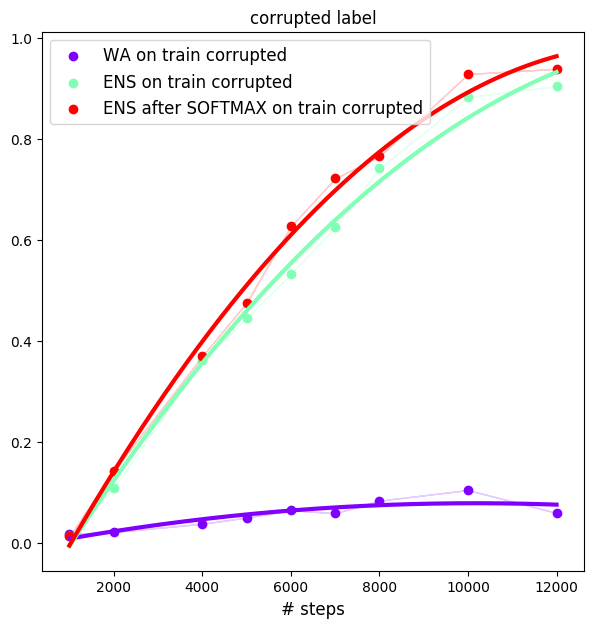

In [23]:

plot.plt.rcParams["figure.figsize"] = (7, 7)
fig = plot.plot_basic_scatter(
        lsoft,
        key_x="step",       
        keys_y=["env_2_in_acc", "env_2_in_acc_ens", "env_2_in_acc_ensp"],
        keys_error=["env_2_in_acc_std", "env_2_in_acc_ens_std", "env_2_in_acc_ensp_std"],
        loc="best",
        keyclustering="step",
        order=2,
        kwargs={"alpha": 0.2},
        title="corrupted label"
        # _dict_key_to_limit={"env_2_in_acc": [-0.05, 0.72]},
    )

In [ ]:
fig = plot.plot_key(
    infhome0_corrupt.l,
    labels=["Clean+Clean", "Clean+Corrupted"],
    key_x="step",
    key_y="env_2_in_acc",
    loc="best",
    keyclustering="step",
    order=2,
    title=key,
    kwargs={"alpha": 0.2}
)


In [ ]:

# Clean OfficeHome

In [ ]:
from oodiidacc import home0_steps

In [ ]:
plot.plt.rcParams["figure.figsize"] = (8, 8)
fig = plot.plot_basic_scatter(
    home0_steps.l[0],
    key_x="step",
    # keys_y=["acc","acc_ens", "acc_netm"],#, "train_acc-train_acc_ens"],
    keys_y=["trainin_acc-trainin_acc_ens", "train_acc-train_acc_ens", "acc-acc_ens"],
    # keys_error=["acc_std", "acc_ens_std"],
    order=2,
    loc="best",
    keycolor="lengthf",
    keyclustering="step+lengthf",
    kwargs={
        "alpha": 0.4,
        "s": 40
    }
)


In [ ]:
plot.dict_key_to_label.update(
    {
        "env_2_in_acc": "WA on train corrupted",
        "env_2_in_acc_ens": "ENS on train corrupted",
        "env_1_in_acc": "WA on train clean",
        "env_1_in_acc_ens": "ENS on train clean",
        "env_1_out_acc": "WA on val clean",
        "env_1_out_acc_ens": "ENS on val clean",
        "trainin_acc": "WA on train",
        "trainin_acc_ens": "ENS on train",
        "trainin_acc_netm": "ERM on train",
        "train_acc": "WA on val",
        "train_acc_ens": "ENS on val",
        "train_acc_netm": "ERM on val",
        "acc": "WA on OOD",
        "acc_ens": "ENS on OOD",
        "acc_netm": "ERM on OOD",
        "acc-acc_ens":  "Accuracy gain of WA over ENS",
    }
)

In [ ]:
plot.plt.rcParams["figure.figsize"] = (8, 8)
fig = plot.plot_histogram_keys(
    home0_steps.l[0],
    list_keys=["trainin_acc-trainin_acc_ens", "train_acc-train_acc_ens", "acc-acc_ens"],
    labels = ["Train ID", "Val ID", "Test OOD"],    
    loc="best",
)



In [ ]:
plot.plt.rcParams["figure.figsize"] = (8, 8)
fig = plot.plot_basic_scatter(
    home0_steps.l[0],
    key_x="step",
    # keys_y=["acc","acc_ens", "acc_netm"],#, "train_acc-train_acc_ens"],
    keys_y=["trainin_acc-trainin_acc_ens", "train_acc-train_acc_ens", "acc-acc_ens"],
    # keys_error=["acc_std", "acc_ens_std"],
    order=2,
    loc="best",
    keycolor="lengthf",
    keyclustering="step+lengthf",
    kwargs={
        "alpha": 0.4,
        "s": 40
    }
)



In [ ]:
# Weighting on one specific case

In [ ]:
plot.SIZE = "small"
fig_dr = plot.plot_key(
    infhomecorrupt1_net_weighting.l,
    key_x="env_2_in_acc_ens",
    key_y="env_2_in_acc",
    labels="fromsplit",
    label="$step={}$",
    order="2",
    loc="best",
    colors=None,
    keycolor="weighting-0.5",
    keysplit="step",
    diag=1,
    lambda_filtering=lambda x: x["testenv"] == 0,
)